
Data TMA RAW tiap 10 menit.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!ls /content/drive/MyDrive/KP_aja/Data/*.xlsx

/content/drive/MyDrive/KP_aja/Data/enso_iod.xlsx


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# 1. Baca Data

In [ ]:
from pandas import read_excel
tm = pd.read_excel('/content/drive/MyDrive/KP_aja/Data/enso_iod.xlsx')
tm

,dtday,index
0,1950-01-01,-1.94
1,1950-02-01,-2.14
2,1950-03-01,-1.58
3,1950-04-01,-1.50
4,1950-05-01,-1.61
...,...,...
847,2020-08-01,-0.59
848,2020-09-01,-0.99
849,2020-10-01,-1.05
850,2020-11-01,-1.13


In [ ]:
tm.head()

,dtday,index
0,1950-01-01,-1.94
1,1950-02-01,-2.14
2,1950-03-01,-1.58
3,1950-04-01,-1.50
4,1950-05-01,-1.61


In [ ]:
#Vektor waktu reference
time_ref = pd.date_range(start='1950-1-1',end='2006-12-1',freq='1D')
time_ref

DatetimeIndex(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04',
               '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08',
               '1950-01-09', '1950-01-10',
               ...
               '2006-11-22', '2006-11-23', '2006-11-24', '2006-11-25',
               '2006-11-26', '2006-11-27', '2006-11-28', '2006-11-29',
               '2006-11-30', '2006-12-01'],
              dtype='datetime64[ns]', length=20789, freq='D')

In [ ]:
#Bandingkan panjang data
tm.shape,time_ref.shape

((852, 2), (20789,))

In [ ]:
tm

,dtday,index
0,1950-01-01,-1.94
1,1950-02-01,-2.14
2,1950-03-01,-1.58
3,1950-04-01,-1.50
4,1950-05-01,-1.61
...,...,...
847,2020-08-01,-0.59
848,2020-09-01,-0.99
849,2020-10-01,-1.05
850,2020-11-01,-1.13


In [ ]:
#Mengganti indeks
tm.index = tm.dtday
tm.drop('dtday',axis=1,inplace=True)
tm=tm.reindex(time_ref,fill_value=np.nan)
tm.shape,time_ref.shape

AttributeError: ignored

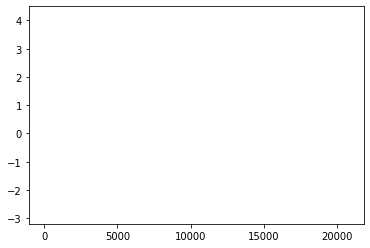

In [ ]:
#Ubah Menjadi TimeSeries
ts = tm.values.flatten()
plt.plot(ts)

In [ ]:
#Ubah menjadi pandas series
dtn = pd.date_range(start='1950-1-1',end='2006-12-1',freq='1D')
ts = pd.Series(ts,index=dtn)
ts

1950-01-01   -1.94
1950-01-02     NaN
1950-01-03     NaN
1950-01-04     NaN
1950-01-05     NaN
              ... 
2006-11-27     NaN
2006-11-28     NaN
2006-11-29     NaN
2006-11-30     NaN
2006-12-01    1.70
Freq: D, Length: 20789, dtype: float64

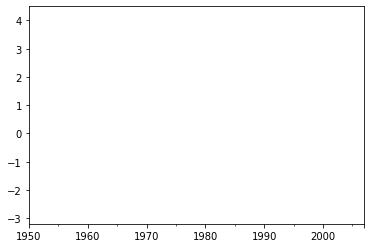

In [ ]:
#Data TMA = 0.0 dianggap Nan
ts[ts==0] = np.nan
ts.plot()

In [ ]:
#Pakai interpolasi? Karena mau mengisi data kosong dengan data periode 10 menit
#Tapi kalau data kosong seperti diatas, dilupakan saja, jadi ambil data yang tidak banyak kosongnya

#Fokus di periode 2018-2019
ts2 = ts['2018':'2019']
ts2.isnull().sum()/ts2.size*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


nan

ValueError: ignored

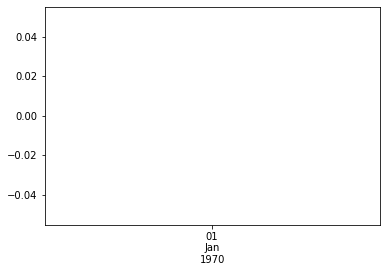

In [ ]:
ts2.plot()

In [ ]:
#Isi Data Kosong (Nan) dengan Interpolasi (dibatasi 6 timestep)
#Jadi kalo lebih dari 6 timestep akan dilewati

ts2.interpolate(method='linear',limit=12,inplace=True)
ts2.isnull().sum()/ts2.size*100
#Ternyata masih ada yg kosong >1jam, lalu ganti 12 timestep

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


nan

In [ ]:
#Karena terlalu panjang data kosong, jadi tidak pakai interpolasi
#Menggunakan klimatologi (groupby atau np)

#Reshape pakai np
clim = np.reshape(ts2.values,(2,365*24*6))
clim = np.nanmean(clim,axis=0)
plt.plot(clim)

ValueError: ignored

In [ ]:
np.isnan(clim).sum()

NameError: ignored

In [ ]:
#Duplicate Clim menjadi 2 tahun
clim = np.tile(clim,(1,2)).flatten()
#Jadikan pandas series
clim = pd.Series(clim,index=ts2.index)
clim

2018-01-01 00:00:00    2.305
2018-01-01 00:10:00    2.310
2018-01-01 00:20:00    2.295
2018-01-01 00:30:00    2.295
2018-01-01 00:40:00    2.290
                       ...  
2019-12-31 23:10:00    2.325
2019-12-31 23:20:00    2.320
2019-12-31 23:30:00    2.330
2019-12-31 23:40:00    2.315
2019-12-31 23:50:00    2.330
Freq: 10T, Length: 105120, dtype: float64

In [ ]:
ts2.shape,clim.shape

((105120,), (105120,))

In [ ]:
clim.size==ts2.size

True

In [ ]:
#Mengisi data kosong dengan klimatologi
ts2.fillna(value=clim,inplace=True)
ts2.isnull().sum()/ts2.size*100

0.0

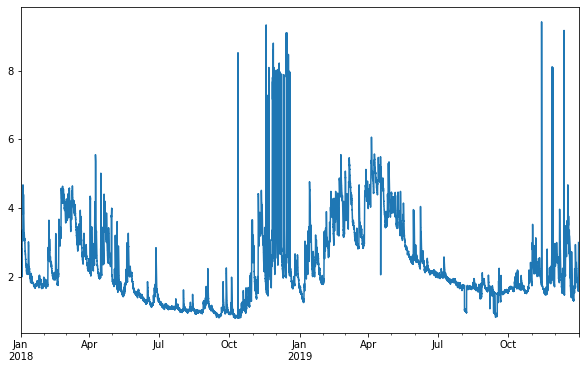

In [ ]:
#Data Timeseries penuh adalah ts2
ts2.plot(figsize=(10,6))

#2. Model dengan ARIMA

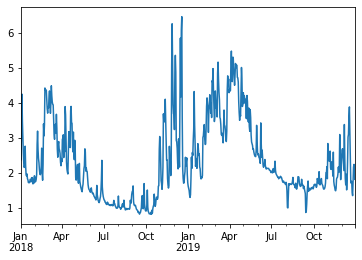

In [ ]:
#Ubah datanya ke data TMA rata-rata harian
tma_day=ts2.resample('1D',label='left').mean()
tma_day.plot()

In [ ]:
#Climatologi harian
tgl =pd.date_range('2018-1-1',periods=365,freq='1D')
clim_day=tma_day.groupby(tma_day.index.dayofyear).mean()
clim_day.index=tgl

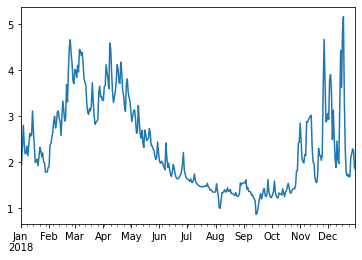

In [ ]:
clim_day.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


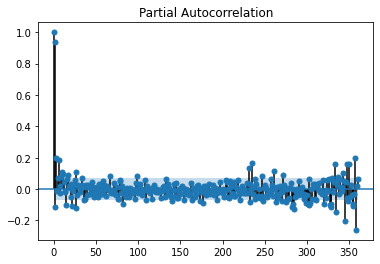

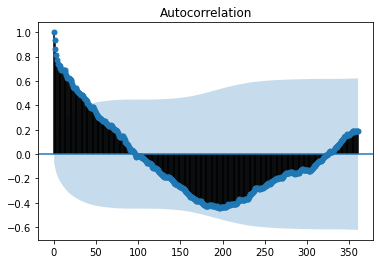

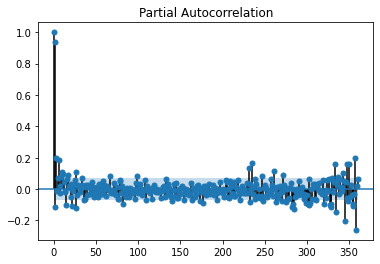

In [ ]:
#Cek ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(tma_day,lags=360)
plot_pacf(tma_day,lags=360)

#Terlihat ada siklus annual, karena korelasinya
#Jadi bisa dibuang pakai SARIMA

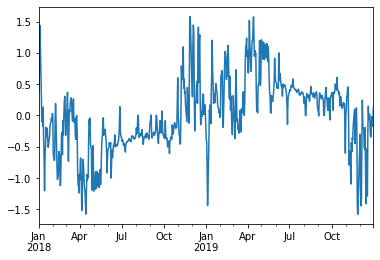

In [ ]:
#Hitung anomali terhadap pola annual
anomali = tma_day-np.tile(clim_day.values,(2,1)).flatten()
anomali.plot()

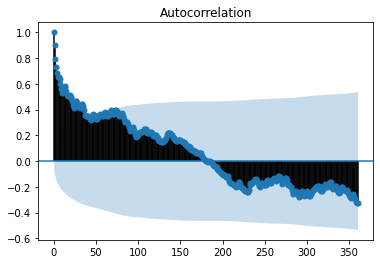

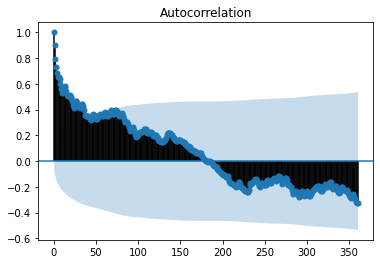

In [ ]:
plot_acf(anomali,lags=360)

In [ ]:
#Training dan Testing
training = anomali['2018-10':'2018-11']
testing = anomali['2018-12-1':'2018-12-5']

In [ ]:
training.size,testing.size

(61, 5)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
historis = [x for x in training.values]
historis

[-0.3382291666666668,
 -0.36597222222222214,
 -0.2880555555555553,
 -0.0842708333333333,
 -0.319357638888889,
 -0.3741319444444444,
 -0.354375,
 -0.3924305555555555,
 -0.5036458333333331,
 -0.4827083333333332,
 -0.4860763888888887,
 -0.4054513888888889,
 -0.6075000000000002,
 -0.40493055555555535,
 -0.4007638888888889,
 -0.3677430555555554,
 -0.33777777777777773,
 -0.374236111111111,
 -0.15052083333333321,
 -0.21743055555555535,
 -0.29779513888888887,
 -0.2439583333333335,
 -0.15361111111111114,
 -0.1139062500000001,
 -0.12829861111111107,
 -0.17918402777777787,
 -0.20581597222222214,
 -0.18989583333333337,
 -0.1873958333333332,
 0.247517361111111,
 0.6016319444444442,
 0.014826388888888875,
 -0.09486111111111128,
 -0.30746527777777755,
 -0.32121527777777814,
 -0.4569791666666665,
 -0.4514583333333331,
 0.012187499999999574,
 0.7911805555555556,
 0.5659722222222223,
 0.6194791666666664,
 0.7827083333333329,
 1.095659722222222,
 0.4348263888888888,
 0.579201388888889,
 0.356562500000000

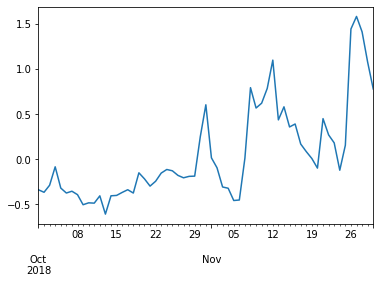

In [ ]:
training.plot()

#Terlihat masih ada trend, sehingga perlu pakai ARIMA

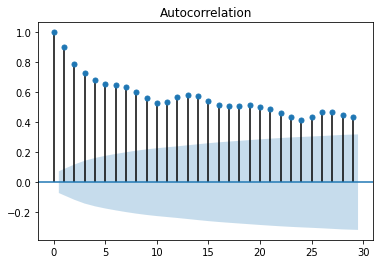

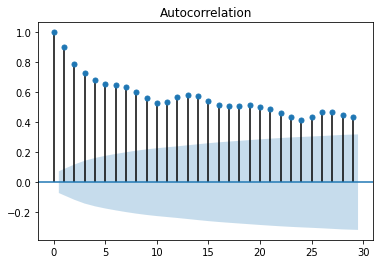

In [ ]:
plot_acf(anomali)

#Ambil dg maksi autokorelasi 0.6 yaitu 5
#Differencing = 1

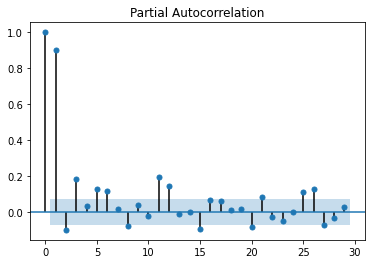

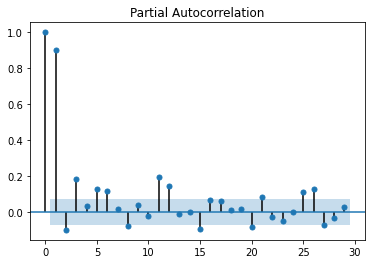

In [ ]:
plot_pacf(anomali)

In [ ]:
#Fitting menggunakan model ARIMA (5,1,1)
orde = (5,1,1)
model = ARIMA(training,order=orde)
model_fit=model.fit()

<function matplotlib.pyplot.legend>

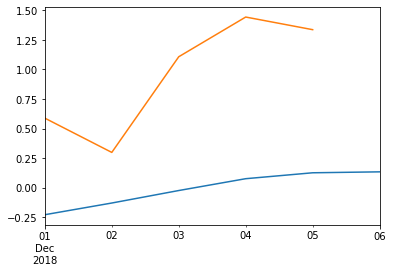

In [ ]:
#Menggunakan fungsi prediksi
prediction = model_fit.predict(start=training.size,end=training.size+testing.size,dynamic=True)
#Bandingkan dengan data testing
prediction.plot(label='Prediksi')
testing.plot(label='Observasi')
plt.legend

#Gabenar ternyata

In [ ]:
#Prediksi dengan rolling forecast
historis = [x for x in training.values]
forecast = testing.values.copy()
for t in range(len(testing)):
  model=ARIMA(historis,order=orde)
  model_fit=model.fit()
  output=model_fit.forecast()
  forecast[t]=output[0]
  historis.append(testing[t])

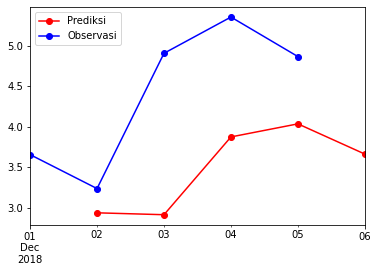

In [ ]:
prediction=prediction[1::]+clim_day['2018-12-1':'2018-12-5'].values
testing_real=testing+clim_day['2018-12-1':'2018-12-5'].values
#Gambar
prediction.plot(color='red',marker='o',label='Prediksi')
testing_real.plot(color='blue',marker='o',label='Observasi')
plt.legend()

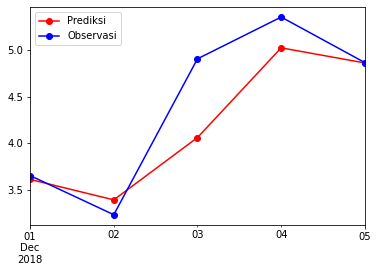

In [ ]:
forecast=pd.Series(forecast,index=testing.index)+clim_day['2018-12-1':'2018-12-5'].values
testing_real=testing+clim_day['2018-12-1':'2018-12-5'].values
#Gambar
forecast.plot(color='red',marker='o',label='Prediksi')
testing_real.plot(color='blue',marker='o',label='Observasi')
plt.legend()